<a href="https://colab.research.google.com/github/szm5417/szm5417/blob/main/2348551_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from mlxtend.frequent_patterns import apriori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
data = pd.read_csv('/content/Market_Basket_Optimisation.csv')

In [11]:
data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data.shape

(7500, 20)

In [13]:
data.describe()

,olive oil
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [15]:
data.isnull().sum()

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

In [14]:
data.drop(columns = 'olive oil')

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data.isnull().sum()

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

In [17]:
transactions = []
for i in range(0,data.shape[0]):
    transactions.append([str(data.values[i,j])for j in range(0,data.shape[1])])

In [32]:
print(transactions)

AttributeError: ignored

In [20]:
transactions = []

for i in range(0, data.shape[0]):
    transaction = [str(data.values[i, j]) for j in range(0, data.shape[1]) if str(data.values[i, j]) != 'nan']
    transactions.append(transaction)

print(transactions)

[['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra dark chocolate'], ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'], ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'], ['rice', 'sparkling water'], ['spaghetti', 'mineral water', 'ham', 'body spray', 'pancakes', 'green tea'], ['burgers', 'grated chee

In [21]:
items = set()
for transaction in transactions:
    items.update(item for item in transaction)
items = list(items)

In [23]:
len(items)

120

In [24]:
binary_matrix = pd.DataFrame(columns=items)
data = []
for transaction in transactions:
    row = [1 if item in transaction else 0 for item in items]
    data.append(row)

binary_matrix = pd.concat([binary_matrix, pd.DataFrame(data, columns=items)], ignore_index=True)

print(binary_matrix)

     ham herb & pepper fresh tuna bug spray mushroom cream sauce  \
0      0             0          0         0                    0   
1      0             0          0         0                    0   
2      0             0          0         0                    0   
3      0             0          0         0                    0   
4      0             0          0         0                    0   
...   ..           ...        ...       ...                  ...   
7495   0             0          0         0                    0   
7496   0             0          0         0                    0   
7497   0             0          0         0                    0   
7498   0             0          0         0                    0   
7499   0             0          0         0                    0   

     low fat yogurt asparagus white wine energy bar toothpaste  ...  \
0                 0         0          0          0          0  ...   
1                 0         0          0 

In [25]:
items10=binary_matrix.sum().sort_values(ascending=False)[:10]
items10

mineral water        1787
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1229
green tea             990
milk                  972
ground beef           737
frozen vegetables     715
pancakes              713
dtype: object

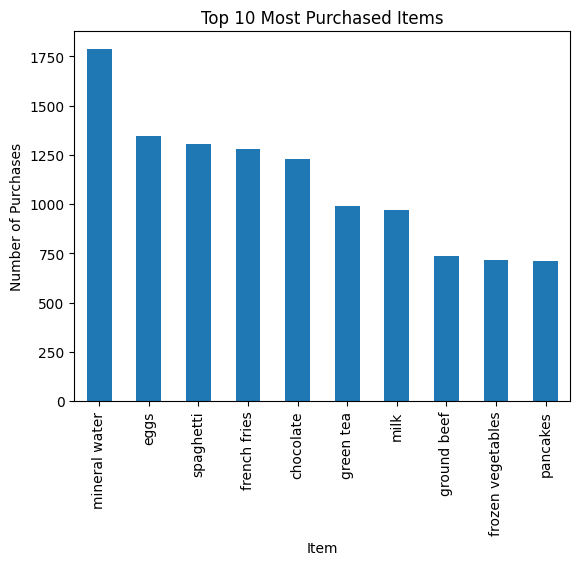

In [26]:
items10.plot(kind='bar')
plt.xlabel("Item")
plt.ylabel("Number of Purchases")
plt.title("Top 10 Most Purchased Items")
plt.show()

In [28]:
last10=binary_matrix.sum().sort_values(ascending=True)[:10]
last10

 asparagus          1
water spray         3
napkins             5
cream               7
bramble            14
tea                29
mashed potato      31
chutney            31
chocolate bread    32
oatmeal            33
dtype: object

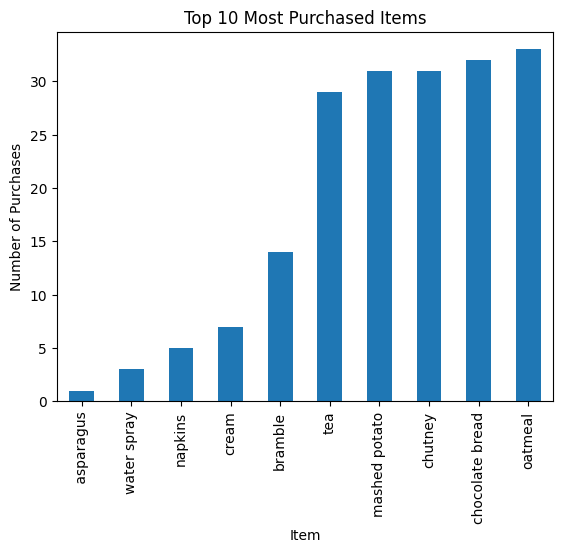

In [29]:
last10.plot(kind='bar')
plt.xlabel("Item")
plt.ylabel("Number of Purchases")
plt.title("Top 10 Most Purchased Items")
plt.show()

In [30]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemset = apriori(binary_matrix,min_support=0.06,use_colnames=True)
rules = association_rules(frequent_itemset,metric='lift',min_threshold=1)

In [33]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
